# KNN--python实现
## KNN思想
#### 如果一个样本在特征空间中与k个实例最为相似(即特征空间中最邻近)，那么这k个实例中大多数属于哪个类别，则该样本也属于这个类别，其中计算样本与其他实例的相似性一般使用距离衡量法，通常使用欧氏距离
## KNN本质
#### KNN训练过程没有算法参与，只有存储训练样本，是一种识记类算法
## KNN特点
### 优点:
#### 1:原理简单，易解释
### 缺点：
#### 1：空间成本较大
#### 2：时间成本较大
#### 3：准确度不高

In [4]:
import numpy as np
import pandas as pd

# 下载数据集
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)

# 特征及类别名称
data.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'species'] 

#三个类别的数据提取出来
X = data.iloc[0:150,0:4].values
y = data.iloc[0:150,4].values
y[y == 'Iris-setosa'] = 0
y[y == 'Iris-versicolor'] = 1                             
y[y == 'Iris-virginica'] = 2 

# 三种lable的数据集
X_setosa,y_setosa = X[0:50],y[0:50]
X_versicolor, y_versicolor = X[50:100], y[50:100]        
X_virginica, y_virginica = X[100:150], y[100:150]  


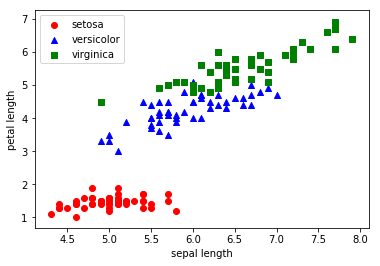

In [6]:
import matplotlib.pyplot as plt

plt.scatter(X_setosa[:, 0], X_setosa[:, 2], color='red', marker='o', label='setosa')
plt.scatter(X_versicolor[:, 0], X_versicolor[:, 2], color='blue', marker='^', label='versicolor')
plt.scatter(X_virginica[:, 0], X_virginica[:, 2], color='green', marker='s', label='virginica')
plt.xlabel('sepal length')
plt.ylabel('petal length')
# 显示图例
plt.legend(loc = 'upper left')
plt.show()

# 划分训练集，测试集，验证集

In [7]:
# training set
X_setosa_train = X_setosa[:30,:]
y_setosa_train = y_setosa[:30]
X_versicolor_train = X_versicolor[:30, :]
y_versicolor_train = y_versicolor[:30]
X_virginica_train = X_virginica[:30, :]
y_virginica_train = y_virginica[:30]
# 数组按垂直方向叠加
X_train = np.vstack([X_setosa_train, X_versicolor_train, X_virginica_train])
# 数组按水平方向叠加
y_train = np.hstack([y_setosa_train, y_versicolor_train, y_virginica_train])

# validation set
X_setosa_val = X_setosa[30:40, :]
y_setosa_val = y_setosa[30:40]
X_versicolor_val = X_versicolor[30:40, :]
y_versicolor_val = y_versicolor[30:40]
X_virginica_val = X_virginica[30:40, :]
y_virginica_val = y_virginica[30:40]
X_val = np.vstack([X_setosa_val, X_versicolor_val, X_virginica_val])
y_val = np.hstack([y_setosa_val, y_versicolor_val, y_virginica_val])

# test set
X_setosa_test = X_setosa[40:50, :]
y_setosa_test = y_setosa[40:50]
X_versicolor_test = X_versicolor[40:50, :]
y_versicolor_test = y_versicolor[40:50]
X_virginica_test = X_virginica[40:50, :]
y_virginica_test = y_virginica[40:50]
X_test = np.vstack([X_setosa_test, X_versicolor_test, X_virginica_test])
y_test = np.hstack([y_setosa_test, y_versicolor_test, y_virginica_test])

# KNN训练函数和预测函数

In [33]:
class KNearestNeighbor(object):
    def __init__(self):
        pass
    # 训练函数
    def train(self, X ,y):
        self.X_train = X
        self.y_train = y
    # 预测函数
    def predict(self,X,k=1):
        #计算L2距离
        num_test = X.shape[0] # 查看矩阵的维数
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test,num_train))
        # because(X - X_train)*(X - X_train) = -2X*X_train + X*X + X_train*X_train, so
        d1 = -2 * np.dot(X, self.X_train.T)    # shape (num_test, num_train)
        d2 = np.sum(np.square(X), axis=1, keepdims=True)    # shape (num_test, 1)  按行相加，并且保持其二维特性
        d3 = np.sum(np.square(self.X_train), axis=1)    # shape (1, num_train)
        dist = np.sqrt(d1 + d2 + d3)
        
        # 根据K值，选择最可能属于的类别
        y_pred = np.zeros(num_test)
        for i in range(num_test):
            dist_k_min = np.argsort(dist[i])[:k]    # 最近邻k个实例位置
            y_kclose = self.y_train[dist_k_min]     # 最近邻k个实例对应的标签
            y_pred[i] = np.argmax(np.bincount(y_kclose.tolist()))    # 找出k个标签中从属类别最多的作为预测类别
            
        return y_pred 

#### 选择合适的K值

In [34]:
KNN = KNearestNeighbor() #创建一个实例对象

### tips  
### 1：计算距离通常使用L1距离和L2距离，L2距离会产生数据增强的效果
###          2：k值的选择，k值选的太小会过拟合，选的太大会欠拟合，在代码中我们设置为k为可调的参数
### 3:  k值的选取一般使用k-fold交叉验证 选择出最佳k值

#### 在验证集上进行k-fold交叉验证。选择不同的K值，根据验证结果，选择最佳的K值

In [35]:
num_folds = 5    # 训练数据分为5 folds
K_classes = [3, 5, 7, 9, 11, 13, 15]    # 所有K值


# 把训练数据分成5份
X_train_folds = []
y_train_folds = []
X_train_folds = np.split(X_train, num_folds)
y_train_folds = np.split(y_train, num_folds)

# 字典用来存储不同K值对应的准确率
K_accuracy = []
k_best = K_classes[0]

for k in K_classes:
    accuracies = []
    for i in range(num_folds):
        Xtr = np.concatenate(X_train_folds[:i] + X_train_folds[i+1:])
        ytr = np.concatenate(y_train_folds[:i] + y_train_folds[i+1:])
        Xcv = X_train_folds[i]
        ycv = y_train_folds[i]
        KNN.train(Xtr, ytr)
        ycv_pred = KNN.predict(Xcv, k=k)
        accuracy = np.mean(ycv_pred == ycv)
        accuracies.append(accuracy)
    accuracies_avg = np.mean(accuracies)
    K_accuracy.append(accuracies_avg)
    if accuracies_avg > k_best:
        k_best = accuracies_avg

# 打印出验证结果
for k in range(len(K_classes)):
    print('k = %d, accuracy: %f' % (K_classes[k], K_accuracy[k]))
print('Best K is: %d\n' % k_best)

k = 3, accuracy: 0.888889
k = 5, accuracy: 0.877778
k = 7, accuracy: 0.888889
k = 9, accuracy: 0.888889
k = 11, accuracy: 0.866667
k = 13, accuracy: 0.855556
k = 15, accuracy: 0.877778
Best K is: 3



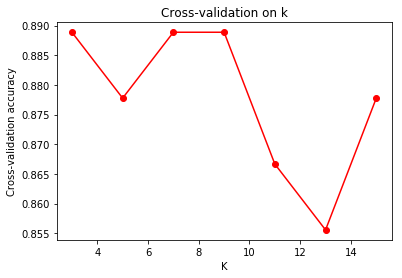

In [36]:
# Plot the cross validation
plt.plot(K_classes, K_accuracy, 'ro-')
plt.title('Cross-validation on k')
plt.xlabel('K')
plt.ylabel('Cross-validation accuracy')
plt.show()

In [37]:
KNN.train(X_train, y_train)
y_pred = KNN.predict(X_test, k=6)
accuracy = np.mean(y_pred == y_test)
print('测试集预测准确率：%f' % accuracy)

测试集预测准确率：1.000000


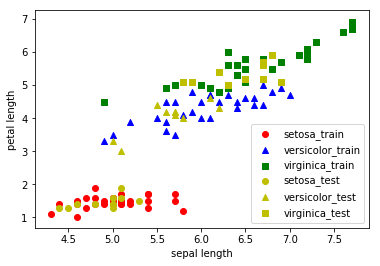

In [38]:
# 训练集
plt.scatter(X_setosa_train[:, 0], X_setosa_train[:, 2], color='red', marker='o', label='setosa_train')
plt.scatter(X_versicolor_train[:, 0], X_versicolor_train[:, 2], color='blue', marker='^', label='versicolor_train')
plt.scatter(X_virginica_train[:, 0], X_virginica_train[:, 2], color='green', marker='s', label='virginica_train')
# 测试集
plt.scatter(X_setosa_test[:, 0], X_setosa_test[:, 2], color='y', marker='o', label='setosa_test')
plt.scatter(X_versicolor_test[:, 0], X_versicolor_test[:, 2], color='y', marker='^', label='versicolor_test')
plt.scatter(X_virginica_test[:, 0], X_virginica_test[:, 2], color='y', marker='s', label='virginica_test')

plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc = 4)
plt.show()

# 注释：
&ensp;  KNN是一种简单直观的分类方法。训练过程保留了全部的特征，把所有的信息都记下来，没有经过处理和提取
### k-fold交叉验证 
>&ensp;数据集A随机分为k个包，每次将其中一个包作为测试集，剩下k-1个包作为训练集进行训练。